# Waveform Characteristics Example
Its useful to know when the waveform "starts" and "ends". Here we summarize how nrutils lets you know about these useful markers. 

In [1]:
## Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import useful things
from nrutils import gwylm,scsearch,romline,maketaper
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from numpy import *

The highest level init for nrutils is located at: /Users/book/JOKI/Libs/KOALA/nrutils_dev/nrutils/__init__.pyc

>> Initiating nrutils ...

>> Sub-Packages to be imported:
   -> core
   -> generate
   -> manipulate
   -> tools
>> Please note style conventions:                  
   * lower case function/method/variable names                  
   * no underscore in names unless there are repeated letters, or counfounded syllables                  
   * information is implicitely in time domain unless explicitely stated.                  
   * frequency domain information will start with "fd".

nrutils:

  .core: 
      .basics*
      .basics
      .nrsc
  .generate: 
  .manipulate: 
      .bundlers
      .rotate
  .tools: 
    .unit: 
      .conversion



In [42]:
#
A = scsearch(keyword='athena',q=2,verbose=True,nonspinning=True,unique=True)

[scsearch]>> Found keyword (='athena') keyword.
[scsearch]>> Found nonspinning (=True) keyword.
[scsearch]>> Found q (=2) keyword.
[scsearch]>> Found unique (=True) keyword.
[scsearch]>> Found validate_remnant (=False) keyword.
[scsearch]>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 unique simulations:
[0001][athena] HR-series: ns-q2.00	(D11_q2.00_a0.0_m180)



In [43]:
#
a = A[0]

#
y = gwylm( a, verbose=True, lm=[(3,2)], clean=True )

(gwylm)>> Found clean (=True) keyword.
(gwylm)>> Found lm (=[(3, 2)]) keyword.
(gwylm)>> Found load (=True) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x109bb77a0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> __make_lmlist__ The l=m=2 multipole will be loaded in order to determine important characteristice of all modes such as noise floor and junk radiation location.
(gwylm.__make_lmlist__)>> The following spherical multipoles will be loaded:[(3, 2), (2, 2)]
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l3_m2_r75.00.asc
(load)>> Loading: Ylm_WEYLSCAL4::Psi4r_l2_m2_r75.00.asc
(gwylm)>> Using w22 from a PN estimate to calculate strain multipoles [see pnw0 in basics.py, and/or arxiv:1310.1528v4].
* w0(w22) = 0.043995 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
(gwylm.calchlm)>> The user should note that there is no minus sign used in front of the double time integral for strain (i.e. Eq 4 of arxiv:1006.1632). This diffe

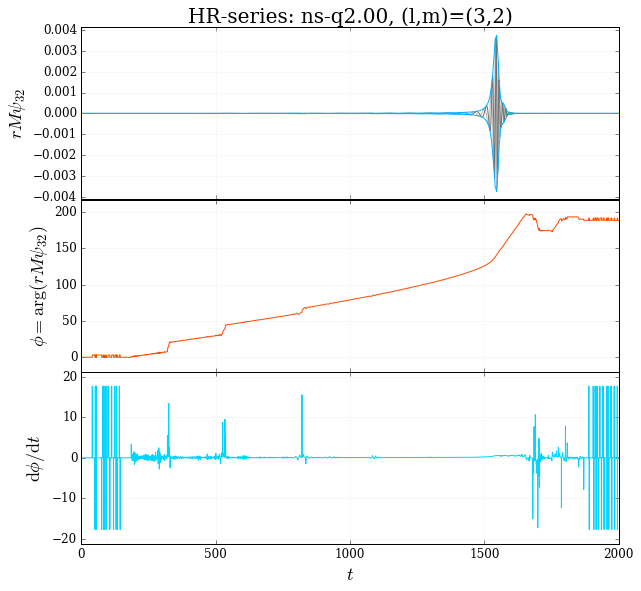

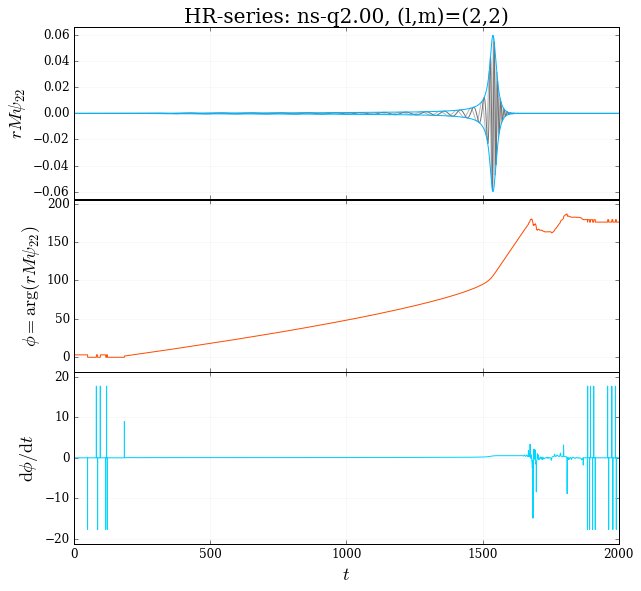

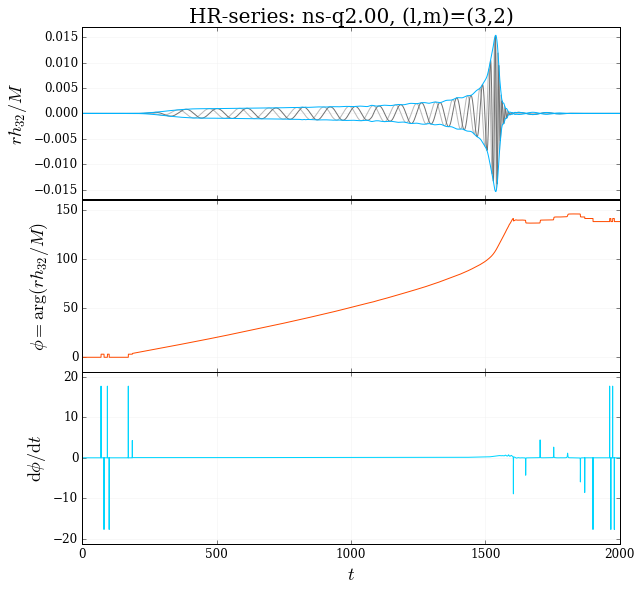

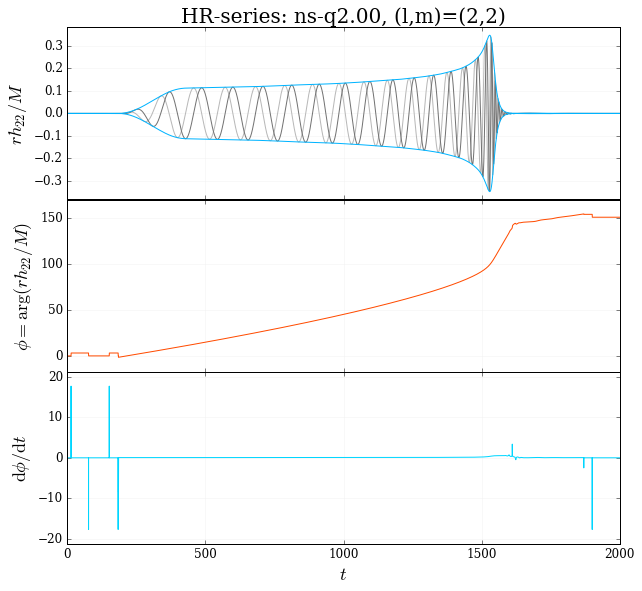

In [44]:
y.plot()

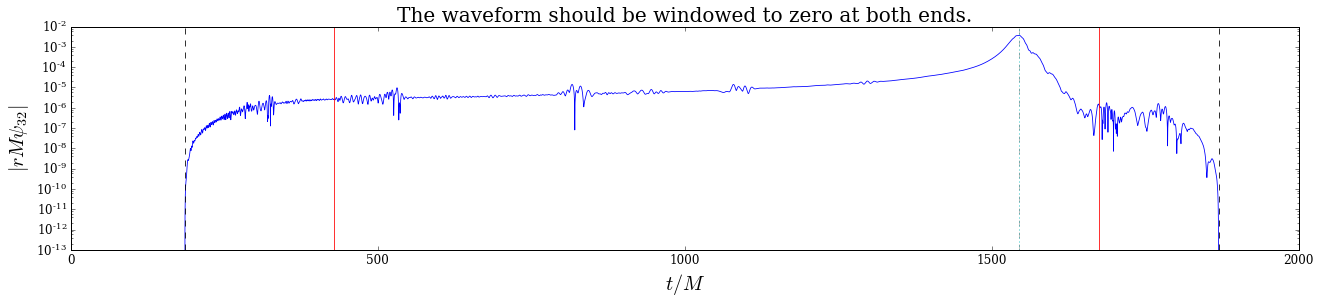

In [45]:
figure( figsize=2*array([11,2]) )

u = y.ylm[0]

plot( u.t, u.amp )

# Demarcate strict beginning and end of waveform
axvline( u.t[y.startindex], linestyle='--', color='k' )
axvline( u.t[y.endindex], linestyle='--', color='k' )

# Demarcate strict (index) peak of waveform
axvline( u.t[u.k_amp_max], linestyle=':', color='c' )
# Demarcate strict INTERPOLATED peak of waveform
axvline( u.intrp_t_amp_max, linestyle='--', color='k', alpha=0.3 )

# Demarcate effective beginning and end of waveform 
axvline( u.t[ y.preinspiral.right_index ], linestyle='-', color='r' )
axvline( u.t[ y.postringdown.left_index ], linestyle='-', color='r' )

gca().set_yscale('log')
xlabel('$t/M$')
ylabel('$|$'+u.kind+'$|$')

title('The waveform should be windowed to zero at both ends.')